In [337]:
import pandas as pd
import numpy as np


In [338]:
df= pd.read_csv("trainData.csv")

In [339]:
df

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment
0,Milk x 7 ltrs,David Taylor,26-04-2011 11:50,26-Apr-11,26-May-11,672.78,672.78,0.0,13
1,Office Stationery,Stephen Wright MD,24-05-2011 09:40,24-May-11,23-Jun-11,5101.98,5101.98,0.0,38
2,Milk x 10 ltrs,Mark Cordova,24-05-2011 12:56,24-Mar-11,23-Apr-11,7422.78,7422.78,0.0,61
3,Annual Fee,Kimberly White,09-07-2011 10:42,10-May-11,24-May-11,11.98,11.98,0.0,62
4,NaN,Teresa Marshall,05-09-2011 20:55,05-Sep-11,06-Sep-11,5501.98,5501.98,0.0,2
...,...,...,...,...,...,...,...,...,...
8748,NaN,Amy Sawyer,31-10-2017 14:40,29-Sep-17,29-Oct-17,551.98,551.98,0.0,34
8749,NaN,Edward Santiago,31-10-2017 14:44,29-Sep-17,29-Oct-17,386.98,386.98,0.0,34
8750,NaN,Angela Becker,31-10-2017 22:07,31-Oct-17,01-Nov-17,279.81,279.81,0.0,5
8751,NaN,Anna Carter,02-11-2017 10:51,23-Oct-17,06-Nov-17,145.98,145.98,0.0,10


In [340]:
df= df.drop("Description",axis=1)

In [341]:
arr= np.array(df["Vendor_Name"])

In [342]:
vendor_name_map={}
tmp=1
for i in arr:
  vendor_name_map[i]=0
for i in arr:
  if vendor_name_map[i]==0:
    vendor_name_map[i]= tmp
    tmp= tmp+1;

In [343]:
tmp1=0
lis=[]
for i in arr:
   lis.append(vendor_name_map[i])
df["name"]=lis


In [344]:
df= df.drop("Vendor_Name",axis=1)

In [345]:
df['Created']=pd.to_datetime(df['Created'],format='%d-%m-%Y %H:%M')

In [346]:
df

,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment,name
0,2011-04-26 11:50:00,26-Apr-11,26-May-11,672.78,672.78,0.0,13,1
1,2011-05-24 09:40:00,24-May-11,23-Jun-11,5101.98,5101.98,0.0,38,2
2,2011-05-24 12:56:00,24-Mar-11,23-Apr-11,7422.78,7422.78,0.0,61,3
3,2011-07-09 10:42:00,10-May-11,24-May-11,11.98,11.98,0.0,62,4
4,2011-09-05 20:55:00,05-Sep-11,06-Sep-11,5501.98,5501.98,0.0,2,5
...,...,...,...,...,...,...,...,...
8748,2017-10-31 14:40:00,29-Sep-17,29-Oct-17,551.98,551.98,0.0,34,3272
8749,2017-10-31 14:44:00,29-Sep-17,29-Oct-17,386.98,386.98,0.0,34,3273
8750,2017-10-31 22:07:00,31-Oct-17,01-Nov-17,279.81,279.81,0.0,5,3274
8751,2017-11-02 10:51:00,23-Oct-17,06-Nov-17,145.98,145.98,0.0,10,3275


In [347]:
df['due_m'] = pd.DatetimeIndex(df['Due_Date']).month
df['due_day'] = pd.DatetimeIndex(df['Due_Date']).day
df['due_wd'] = pd.DatetimeIndex(df['Due_Date']).weekday
df['due_y'] = pd.DatetimeIndex(df['Due_Date']).year-2010

df['inv_m'] = pd.DatetimeIndex(df['Invoice_Date']).month
df['inv_day'] = pd.DatetimeIndex(df['Invoice_Date']).day
df['inv_wd'] = pd.DatetimeIndex(df['Invoice_Date']).weekday
df['inv_y'] = pd.DatetimeIndex(df['Invoice_Date']).year-2010

df['created_m'] = pd.DatetimeIndex(df['Created']).month
df['created_day'] = pd.DatetimeIndex(df['Created']).day
df['created_wd'] = pd.DatetimeIndex(df['Created']).weekday
df['created_y'] = pd.DatetimeIndex(df['Created']).year-2010
df['created_hr'] = pd.DatetimeIndex(df['Created']).hour
df['created_mn'] = pd.DatetimeIndex(df['Created']).minute



In [348]:
df['due_w'] = (df['due_day']/7+1).astype(int)
df['inv_w'] = (df['inv_day']/7+1).astype(int)
df['created_w'] = (df['created_day']/7+1).astype(int)

In [349]:
# df['created_w']

In [350]:
df['Number_of_Days_until_Payment'] = df['Number_of_Days_until_Payment'].astype(float)

In [351]:
created=[]
invoice=[]
due=[]
for i in range(0,len(df)):
  created.append((df['created_y'][i])*365+(df['created_m'][i])*30+(df['created_day'][i]))  
for i in range(0,len(df)):
  invoice.append((df['inv_y'][i])*365+(df['inv_m'][i])*30+(df['inv_day'][i]))  
for i in range(0,len(df)):
  due.append((df['due_y'][i])*365+(df['due_m'][i])*30+(df['due_day'][i]))  
creinv=[]
invdue=[]
duecre=[]
for i in range(0,len(df)):
  creinv.append(created[i]-invoice[i])  
for i in range(0,len(df)):
  invdue.append(invoice[i]-due[i])  
for i in range(0,len(df)):
  duecre.append(due[i]-created[i])
df['creinv']=creinv  
df['invdue']=invdue
df['duecre']=duecre  



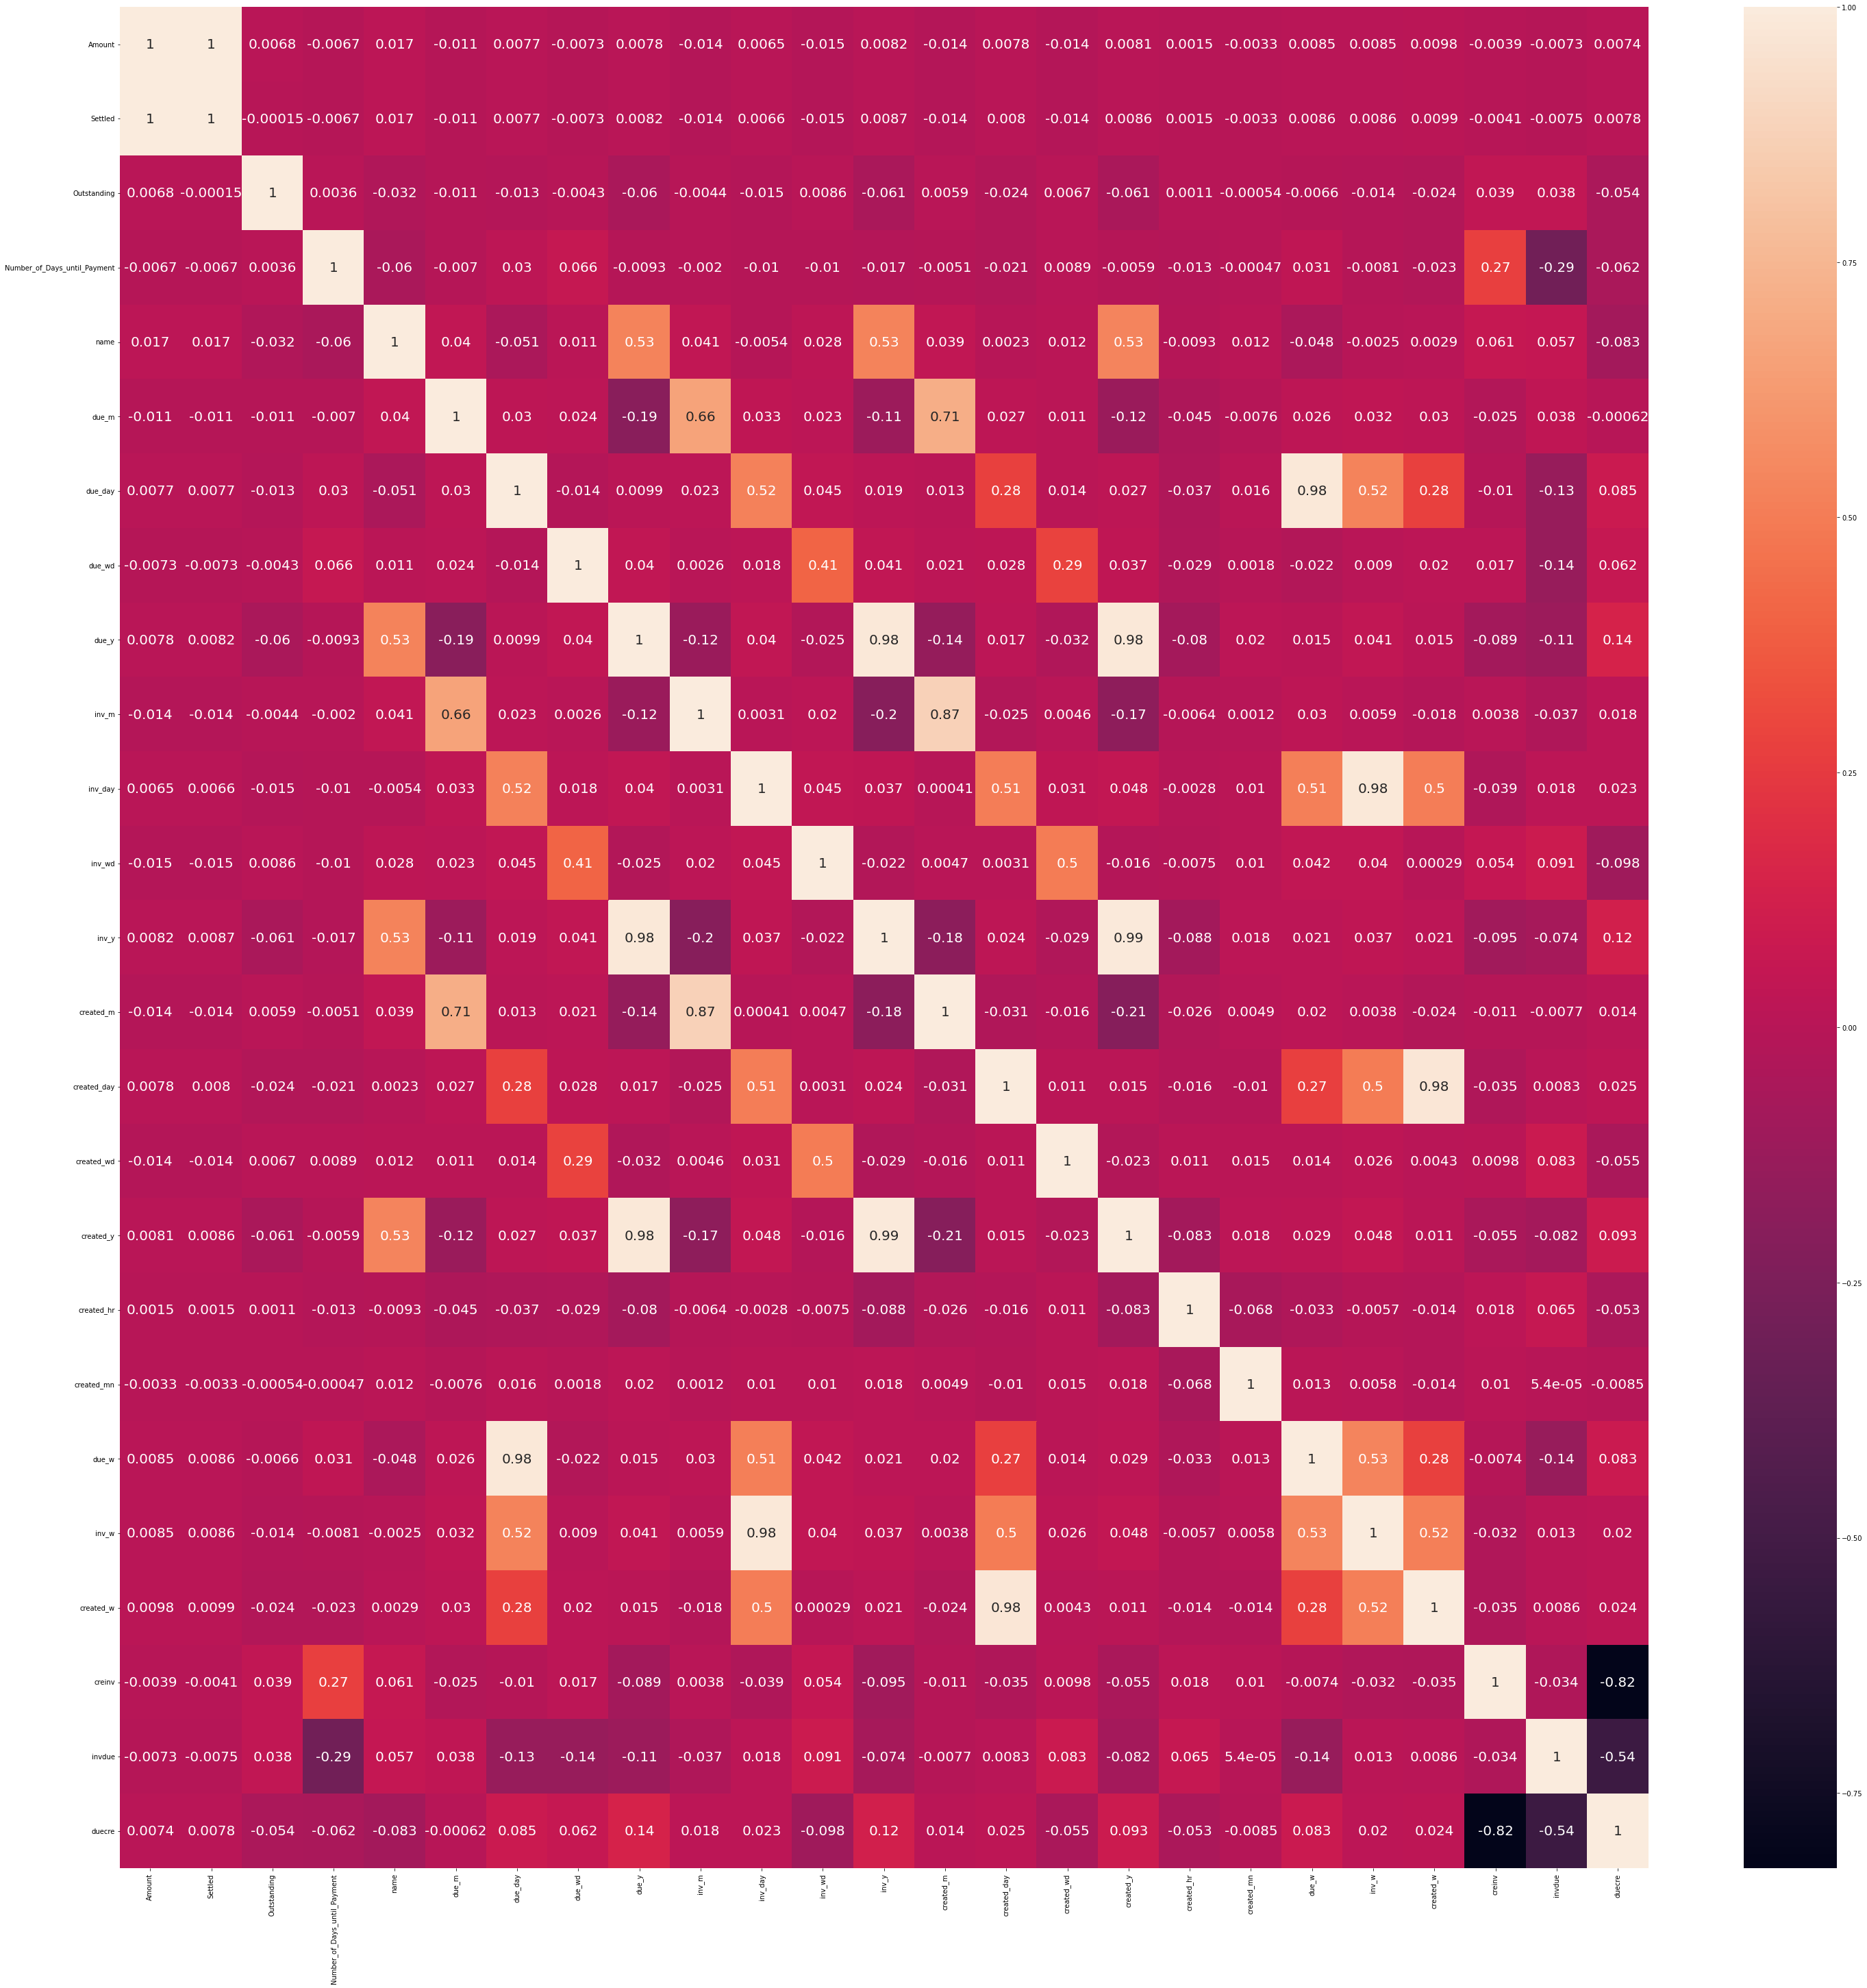

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns
corrm = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corrm, annot=True, annot_kws={'size':20})

In [353]:
df = df.drop(columns = ['Created','Invoice_Date' , 'Due_Date'])

In [354]:
y=np.array(df['Number_of_Days_until_Payment']).astype(int)
df = df.drop(columns = ['Number_of_Days_until_Payment'])

In [355]:
x=df

In [356]:
df.dtypes

Amount         float64
Settled        float64
Outstanding    float64
name             int64
due_m            int64
due_day          int64
due_wd           int64
due_y            int64
inv_m            int64
inv_day          int64
inv_wd           int64
inv_y            int64
created_m        int64
created_day      int64
created_wd       int64
created_y        int64
created_hr       int64
created_mn       int64
due_w            int64
inv_w            int64
created_w        int64
creinv           int64
invdue           int64
duecre           int64
dtype: object

In [357]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.030, random_state=42)

In [358]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [359]:
!pip install catboost
import catboost as cb

In [360]:
train_data = cb.Pool(x_train, y_train) 
test_data = cb.Pool(x_test, y_test)

In [361]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=17,n_estimators=200)
model_rf.fit(x_train , y_train)

RandomForestRegressor(max_depth=17, n_estimators=200)

In [362]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
score = np.sqrt(mean_squared_error(y_test, model_rf.predict(x_test)))
print(score)

21.42121244252441


In [363]:
model = model_rf

In [364]:
test_data = pd.read_csv('testData.csv')
ans = pd.DataFrame()
ans['Vendor_Name'] = test_data['Vendor_Name']

In [365]:
arr1= np.array(test_data["Vendor_Name"])
lis=[]
for i in arr1:
   lis.append(vendor_name_map[i])
test_data["name"]=lis

In [366]:
test_data= test_data.drop("Description",axis=1)
test_data['Created']=pd.to_datetime(test_data['Created'],format='%d-%m-%Y %H:%M')
test_data['due_m'] = pd.DatetimeIndex(test_data['Due_Date']).month
test_data['due_day'] = pd.DatetimeIndex(test_data['Due_Date']).day
test_data['due_wd'] = pd.DatetimeIndex(test_data['Due_Date']).weekday
test_data['due_y'] = pd.DatetimeIndex(test_data['Due_Date']).year-2010

test_data['inv_m'] = pd.DatetimeIndex(test_data['Invoice_Date']).month
test_data['inv_day'] = pd.DatetimeIndex(test_data['Invoice_Date']).day
test_data['inv_wd'] = pd.DatetimeIndex(test_data['Invoice_Date']).weekday
test_data['inv_y'] = pd.DatetimeIndex(test_data['Invoice_Date']).year-2010

test_data['created_m'] = pd.DatetimeIndex(test_data['Created']).month
test_data['created_day'] = pd.DatetimeIndex(test_data['Created']).day
test_data['created_wd'] = pd.DatetimeIndex(test_data['Created']).weekday
test_data['created_y'] = pd.DatetimeIndex(test_data['Created']).year-2010
test_data['created_hr'] = pd.DatetimeIndex(test_data['Created']).hour
test_data['created_mn'] = pd.DatetimeIndex(test_data['Created']).minute

test_data['due_w'] = (test_data['due_day']/7+1).astype(int)
test_data['inv_w'] = (test_data['inv_day']/7+1).astype(int)
test_data['created_w'] = (test_data['created_day']/7+1).astype(int)
created1=[]
invoice1=[]
due1=[]
for i in range(0,len(test_data)):
  created1.append((test_data['created_y'][i])*365+(test_data['created_m'][i])*30+(test_data['created_day'][i]))  
for i in range(0,len(test_data)):
  invoice1.append((test_data['inv_y'][i])*365+(test_data['inv_m'][i])*30+(test_data['inv_day'][i]))  
for i in range(0,len(test_data)):
  due1.append((test_data['due_y'][i])*365+(test_data['due_m'][i])*30+(test_data['due_day'][i]))  
creinv1=[]
invdue1=[]
duecre1=[]
for i in range(0,len(test_data)):
  creinv1.append(created1[i]-invoice1[i])  
for i in range(0,len(test_data)):
  invdue1.append(invoice1[i]-due1[i])  
for i in range(0,len(test_data)):
  duecre1.append(due1[i]-created1[i])
test_data['creinv']=creinv1  
test_data['invdue']=invdue1
test_data['duecre']=duecre1  



In [367]:
test_data = test_data.drop(columns = ['Created','Invoice_Date' , 'Due_Date'])

In [368]:
test_data = test_data.drop(columns = ['Vendor_Name'])

In [369]:
x_result= test_data
x_result.dtypes

Amount         float64
Settled        float64
Outstanding    float64
name             int64
due_m            int64
due_day          int64
due_wd           int64
due_y            int64
inv_m            int64
inv_day          int64
inv_wd           int64
inv_y            int64
created_m        int64
created_day      int64
created_wd       int64
created_y        int64
created_hr       int64
created_mn       int64
due_w            int64
inv_w            int64
created_w        int64
creinv           int64
invdue           int64
duecre           int64
dtype: object

In [370]:
y_pred = model.predict(x_result)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [371]:
ans['Number_of_Days_until_Payment'] = (((np.array(y_pred))))
ans["Number_of_Days_until_Payment"]=ans["Number_of_Days_until_Payment"].astype(int) 

In [372]:
ans.to_csv('result.csv' , index = False)

In [373]:
a = pd.read_csv('result.csv')